In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.cloud import bigquery

In [64]:
file_path = '/kaggle/input/used-cars-price/Cars Dataset.csv'
ucp_data = pd.read_csv(file_path)

['Model', 'Year', ' Km/h ', 'Color', 'Type', 'Fuel', 'Price']

In [66]:
ucp_data.head()

,Model,Year,Km/h,Color,Type,Fuel,Price
0,Hyundai Elantra HD,2009.0,"165,000",Gray,Automatic,Gasoline,"560,000"
1,Hyundai Elantra,2010.0,"194,000",Black,Automatic,Gasoline,"600,000"
2,Hyundai Elantra HD,2010.0,"205,000",Silver,Automatic,Gasoline,"575,000"
3,Hyundai Elantra,2010.0,"160,000",Black,Automatic,Gasoline,"550,000"
4,Hyundai Elantra,2009.0,"140,451",Eggplant,Automatic,Gasoline,"650,000"


In [73]:
ucp_data.tail()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Model,Year,Km/h,Color,Type,Fuel,Price
952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
ucp_data.columns.to_list()

['Model', 'Year', ' Km/h ', 'Color', 'Type', 'Fuel', 'Price']

In [70]:
ucp_data.isnull().sum()

Model     358
Year      358
 Km/h     358
Color     358
Type      358
Fuel      358
Price     358
dtype: int64

In [71]:
ucp_data.dropna()

,Model,Year,Km/h,Color,Type,Fuel,Price
0,Hyundai Elantra HD,2009.0,"165,000",Gray,Automatic,Gasoline,"560,000"
1,Hyundai Elantra,2010.0,"194,000",Black,Automatic,Gasoline,"600,000"
2,Hyundai Elantra HD,2010.0,"205,000",Silver,Automatic,Gasoline,"575,000"
3,Hyundai Elantra,2010.0,"160,000",Black,Automatic,Gasoline,"550,000"
4,Hyundai Elantra,2009.0,"140,451",Eggplant,Automatic,Gasoline,"650,000"
...,...,...,...,...,...,...,...
594,KIA Picanto,2015.0,"70,000",Silver,Automatic,Gasoline,"535,000"
595,Mitsubishi Lancer EX Shark,2015.0,"120,000",Black,Automatic,Gasoline,"660,000"
596,Ssang Yong Torres,2024.0,"4,000",White,Automatic,Gasoline,"1,900,000"
597,KIA Cerato,2011.0,"200,000",Red,Automatic,Gasoline,"665,000"


# **Data Visualization**

In [31]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

<ipython-input-31-3b18b9ececc6>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Axes: xlabel='count', ylabel='Year'>

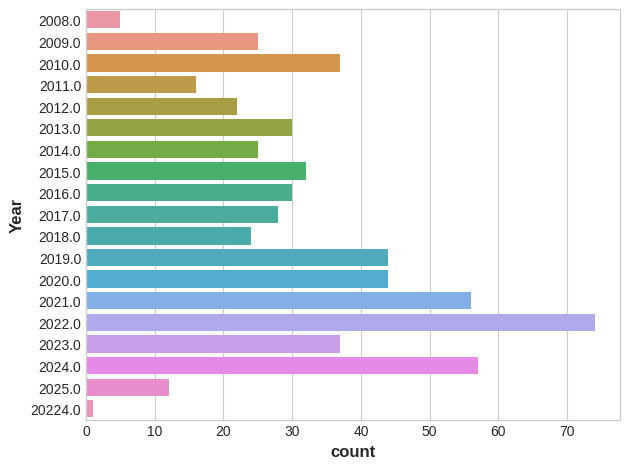

In [84]:
#year_sum = ucp_data.groupby("Year").Year.count()

sns.countplot(ucp_data, y="Year")

**The Year can't be over 2026**

In [91]:
ucp_data.drop(ucp_data[(ucp_data["Year"]>=2026)].index, inplace=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


<Axes: xlabel='count', ylabel='Year'>

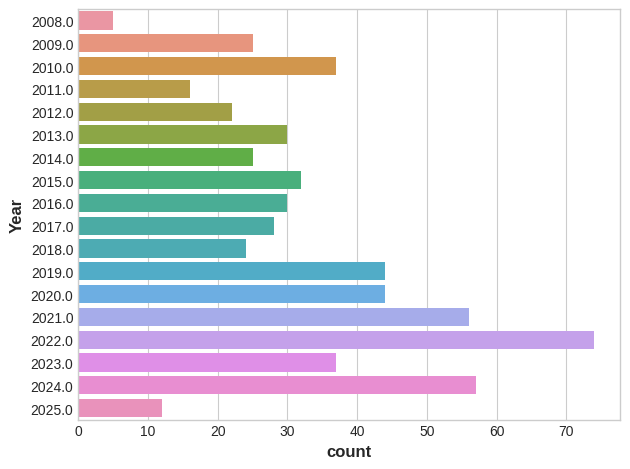

In [92]:
sns.countplot(ucp_data, y="Year")

**Now, it's good**

<Axes: xlabel='count', ylabel='Color'>

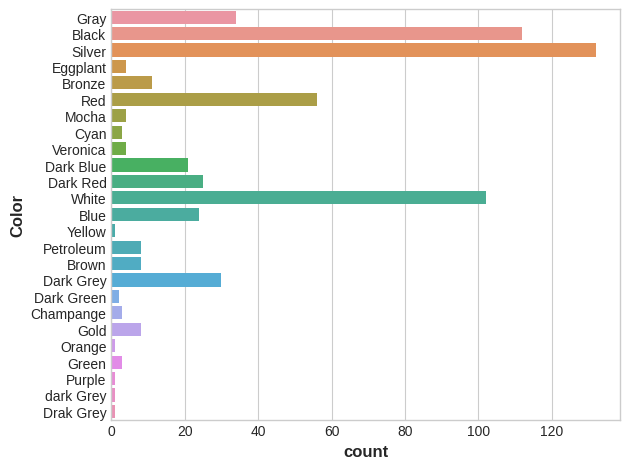

In [86]:
sns.countplot(ucp_data, y="Color")

# **Data Featuring**

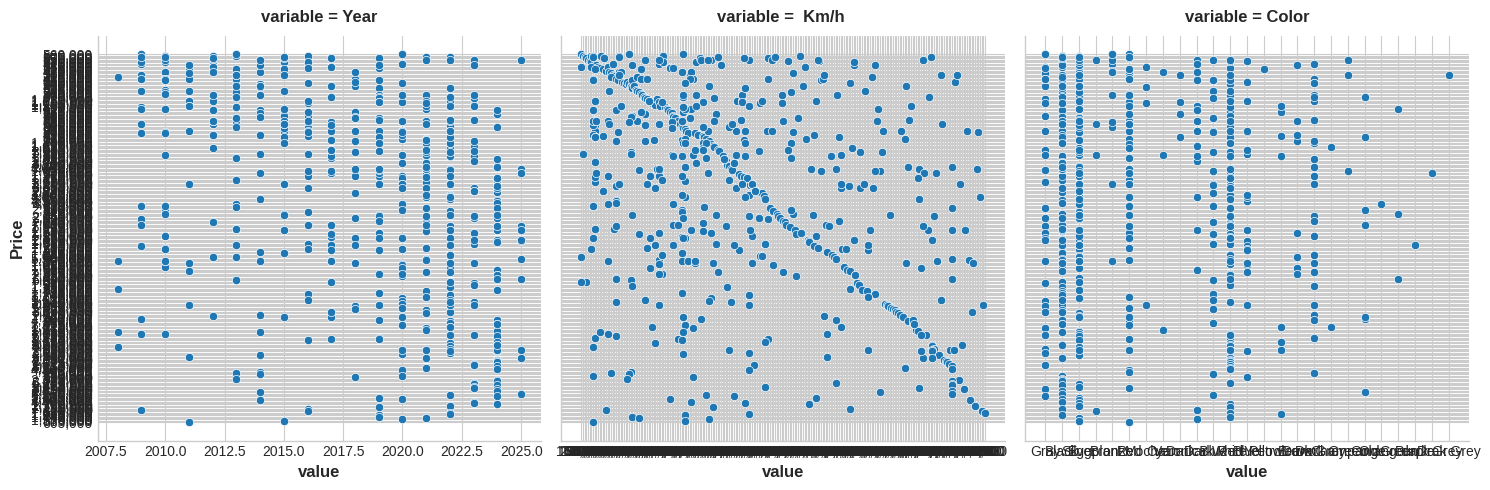

In [93]:
features = ["Year", " Km/h ", "Color"]
sns.relplot(
    x="value", y="Price", col="variable", data=ucp_data.melt(id_vars="Price", value_vars=features), facet_kws=dict(sharex=False),
);